In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import Imputer

%matplotlib inline

### Import and Understanding

In [2]:
data = pd.read_csv('./data/train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
data.shape

(1460, 81)

In [4]:
# data.info()

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Shows columns with object data types
data.select_dtypes(['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Data Cleaning

In [7]:
# Select text/categorical types and fill null values with the string 'NA'
categories = data.select_dtypes(['object']).fillna('NA', axis=1)
categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [8]:
# Iterate through columns and convert dtypes to category
# note - doesn't appear there is a method to do this at this time (df.astype('category'))
# Encode each category column as enumerable integer
for column in categories:
    categories[column] = categories[column].astype('category')
    categories[column] = categories[column].cat.codes
    
categories.head()

# NOTE - the above is generally not a good method - better is one hot encoding

# trying one hot encoding - (modified) https://gist.github.com/ipashchenko/c643a0bfac0ba2e5fbd92cb6f664f92c
# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# encoded_cat = pd.DataFrame(vec.fit_transform(categories.to_dict('records')).toarray())
# encoded_cat.columns = vec.get_feature_names()
# encoded_cat.index = categories.index

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4


In [9]:
# Select numerical types
numbers = data.select_dtypes([np.number])
numbers.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# use an imputer to substitude null values with the median of the column
imputer = Imputer(strategy='median')
X = imputer.fit_transform(numbers)
Numbers = pd.DataFrame(X, columns=numbers.columns)
Numbers.head()

# Note - probably should learn to use a multiple imputation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [41]:
# Combine both filled data types into one
# clean_data = pd.concat([Numbers,categories], axis=1)
# clean_data.head()

# clean_data = pd.concat([Numbers,encoded_cat], axis=1)
# clean_data.head()

clean_data = Numbers

In [42]:
# Split features from the label
X = clean_data.drop('SalePrice', axis=1)
y = clean_data['SalePrice']

In [43]:
print('Features shape: {}'.format(X.shape))
print('Labels shape: {}'.format(y.shape))

Features shape: (1460, 37)
Labels shape: (1460,)


### Visualization

In [14]:
corr_matrix = X.corr()
ordered_correlations = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
# print(ordered_correlations.head(15))
# print(ordered_correlations.tail(15))

### Training

In [44]:
# Split up the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# should try stratified for each set

In [45]:
linear_model = LinearRegression()

In [46]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Coefficients
model_coeff = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coeff'])
# model_coeff

In [70]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     877.6
Date:                Tue, 12 Sep 2017   Prob (F-statistic):               0.00
Time:                        01:23:06   Log-Likelihood:                -12150.
No. Observations:                1022   AIC:                         2.437e+04
Df Residuals:                     987   BIC:                         2.454e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Id                1.1351      2.734      0.415

### Prediction

In [47]:
y_predict = linear_model.predict(X_test)

In [55]:
linear_model.score(X_test, y_test)

0.79900642138460531

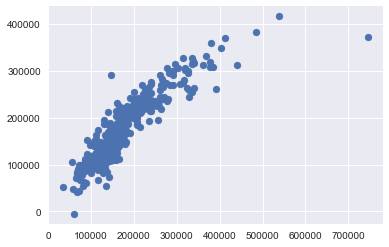

In [48]:
plt.scatter(y_test, y_predict)

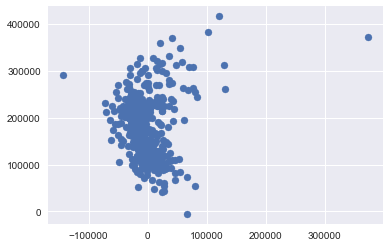

In [49]:
plt.scatter(y_test - y_predict, y_predict)

In [50]:
r2 = r2_score(y_test, y_predict)
r2

0.79900642138460531

C:\Users\joshua.deleon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


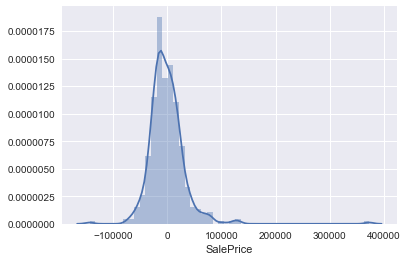

In [51]:
sns.distplot(y_test - y_predict)

### Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model, X, y, cv=10)
scores

array([ 0.83173064,  0.85801918,  0.88555272,  0.7462486 ,  0.82682963,
        0.83009956,  0.82182004,  0.81708229,  0.49389327,  0.83828175])

### Kaggle Test set 

In [24]:
test = pd.read_csv('./data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
test.shape

(1459, 80)

In [26]:
# Clean test data - will need to look into pipelines for the future

# Select text/categorical types and fill null values with the string 'NA'
test_categories = test.select_dtypes(['object']).fillna('NA', axis=1)

# Iterate through columns and convert dtypes to category
# note - doesn't appear there is a method to do this at this time (df.astype('category'))
# Encode each category column as enumerable integer
for column in test_categories:
    test_categories[column] = test_categories[column].astype('category')
    test_categories[column] = test_categories[column].cat.codes

# Select numerical types
test_numbers = test.select_dtypes([np.number])

# use an imputer to substitude null values with the median of the column
test_imputer = Imputer(strategy='median')
test_imputed = imputer.fit_transform(test_numbers)
Test_numbers = pd.DataFrame(test_imputed, columns=test_numbers.columns)

# Combine both filled data types into one
test_cleaned = pd.concat([Test_numbers,test_categories], axis=1)
test_cleaned.shape

(1459, 80)

In [27]:
y_test_predict = linear_model.predict(test_cleaned)


In [28]:
id_start = 1461

In [29]:
ids = pd.DataFrame(np.array(range(id_start, len(y_test_predict) + id_start)), index=range(0, len(y_test_predict)), columns=['Id'])
ids.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [30]:
test_df = pd.DataFrame(data=y_test_predict, index=range(0,len(y_test_predict)), columns=['SalePrice'])
test_df.head()

,SalePrice
0,194837.705365
1,253024.313224
2,258782.803304
3,287108.806176
4,281517.909395


In [31]:
submission = pd.concat([ids, test_df], axis=1)
submission.tail()

,Id,SalePrice
1454,2915,161418.527055
1455,2916,145949.108584
1456,2917,233341.819351
1457,2918,199757.896606
1458,2919,334516.567042


In [32]:
# Find negative value and remove
submission[submission['SalePrice'] < 0]
submission.set_value(1139, 'SalePrice', 0)
submission.iloc[1139]

Id           2600.0
SalePrice       0.0
Name: 1139, dtype: float64

In [33]:
# submission.to_csv('./data/submission.csv', index=False)